In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# Read the file using pandas libraries
bt = pd.read_excel(r"C:\Users\abhip\Desktop\btcusd_1-min_data (1).xlsx")

In [3]:
bt

,Timestamp,Open,High,Low,Close,Volume
0,1325412060,4.58,4.58,4.58,4.58,0.000000
1,1325412120,4.58,4.58,4.58,4.58,0.000000
2,1325412180,4.58,4.58,4.58,4.58,0.000000
3,1325412240,4.58,4.58,4.58,4.58,0.000000
4,1325412300,4.58,4.58,4.58,4.58,0.000000
...,...,...,...,...,...,...
1048570,1388333460,709.69,709.69,709.69,709.69,1.152604
1048571,1388333520,709.69,709.69,709.69,709.69,0.000000
1048572,1388333580,709.69,709.69,709.69,709.69,0.330000
1048573,1388333640,709.70,709.70,709.70,709.70,0.402601


In [4]:
bt.head()

,Timestamp,Open,High,Low,Close,Volume
0,1325412060,4.58,4.58,4.58,4.58,0.0
1,1325412120,4.58,4.58,4.58,4.58,0.0
2,1325412180,4.58,4.58,4.58,4.58,0.0
3,1325412240,4.58,4.58,4.58,4.58,0.0
4,1325412300,4.58,4.58,4.58,4.58,0.0


In [5]:
bt.tail()

,Timestamp,Open,High,Low,Close,Volume
1048570,1388333460,709.69,709.69,709.69,709.69,1.152604
1048571,1388333520,709.69,709.69,709.69,709.69,0.000000
1048572,1388333580,709.69,709.69,709.69,709.69,0.330000
1048573,1388333640,709.70,709.70,709.70,709.70,0.402601
1048574,1388333700,709.70,709.70,709.70,709.70,0.000000


In [6]:
bt.sample(5)

,Timestamp,Open,High,Low,Close,Volume
609565,1361989560,31.09,31.09,31.09,31.09,0.000000
588561,1360729320,25.02,25.02,25.00,25.00,13.758682
377909,1348086600,12.47,12.47,12.47,12.47,0.000000
990986,1384878420,625.30,628.48,625.21,625.31,23.577121
328841,1345142520,13.42,13.42,13.42,13.42,0.000000


In [7]:
bt.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [8]:
bt.size

6291450

In [9]:
bt.shape

(1048575, 6)

In [10]:
bt.describe()

,Timestamp,Open,High,Low,Close,Volume
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.356872e+09,9.555659e+01,9.567038e+01,9.542809e+01,9.555133e+01,5.320081e+00
std,1.816383e+07,1.898933e+02,1.902193e+02,1.895322e+02,1.898865e+02,2.854537e+01
min,1.325412e+09,3.800000e+00,3.800000e+00,3.800000e+00,3.800000e+00,0.000000e+00
25%,1.341141e+09,6.800000e+00,6.800000e+00,6.800000e+00,6.800000e+00,0.000000e+00
50%,1.356873e+09,1.334000e+01,1.334000e+01,1.334000e+01,1.334000e+01,0.000000e+00
75%,1.372601e+09,1.101500e+02,1.102300e+02,1.100300e+02,1.101300e+02,9.008000e-01
max,1.388334e+09,1.163000e+03,1.163000e+03,1.162990e+03,1.163000e+03,2.958478e+03


In [11]:
bt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Timestamp  1048575 non-null  int64  
 1   Open       1048575 non-null  float64
 2   High       1048575 non-null  float64
 3   Low        1048575 non-null  float64
 4   Close      1048575 non-null  float64
 5   Volume     1048575 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 48.0 MB


In [12]:
bt.isnull().sum()

Timestamp    0
Open         0
High         0
Low          0
Close        0
Volume       0
dtype: int64

<h4 style='color:red',text align='center'>Float columns data convert into integer</h4>

In [13]:
bt['Open']=bt['Open'].astype(int)
bt['High']=bt['High'].astype(int)
bt['Low']=bt['Low'].astype(int)
bt['Close']=bt['Close'].astype(int)
bt['Volume']=bt['Volume'].astype(int)

In [14]:
bt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   Timestamp  1048575 non-null  int64
 1   Open       1048575 non-null  int32
 2   High       1048575 non-null  int32
 3   Low        1048575 non-null  int32
 4   Close      1048575 non-null  int32
 5   Volume     1048575 non-null  int32
dtypes: int32(5), int64(1)
memory usage: 28.0 MB


In [15]:
x = bt.drop(['Open'],axis=1)
y = bt['Open']

In [16]:
x

,Timestamp,High,Low,Close,Volume
0,1325412060,4,4,4,0
1,1325412120,4,4,4,0
2,1325412180,4,4,4,0
3,1325412240,4,4,4,0
4,1325412300,4,4,4,0
...,...,...,...,...,...
1048570,1388333460,709,709,709,1
1048571,1388333520,709,709,709,0
1048572,1388333580,709,709,709,0
1048573,1388333640,709,709,709,0


In [17]:
y

0            4
1            4
2            4
3            4
4            4
          ... 
1048570    709
1048571    709
1048572    709
1048573    709
1048574    709
Name: Open, Length: 1048575, dtype: int32

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)

In [19]:
lin_reg_model=LinearRegression()

In [20]:
lin_reg_model.fit(x_train,y_train)

LinearRegression()

In [21]:

trainning_data_prediction = lin_reg_model.predict(x_train)

In [22]:
error_score = metrics.r2_score(y_train,trainning_data_prediction)
print('r Squred error :',error_score)

r Squred error : 0.9999925012694495


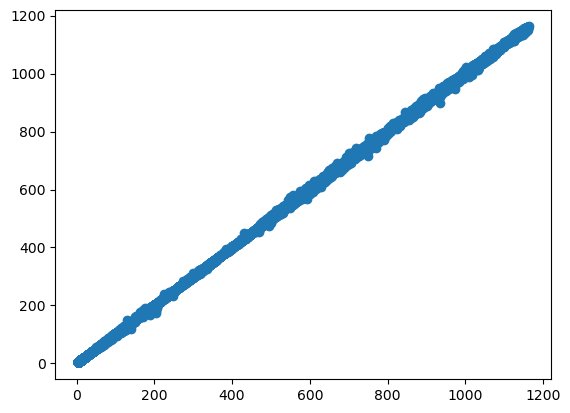

In [23]:
plt.scatter(y_train,trainning_data_prediction)

In [24]:
test_data_prediction = lin_reg_model.predict(x_test)

In [25]:
error_score = metrics.r2_score(y_test,test_data_prediction)
print('R squred error:',error_score)

R squred error: 0.9999921116904253


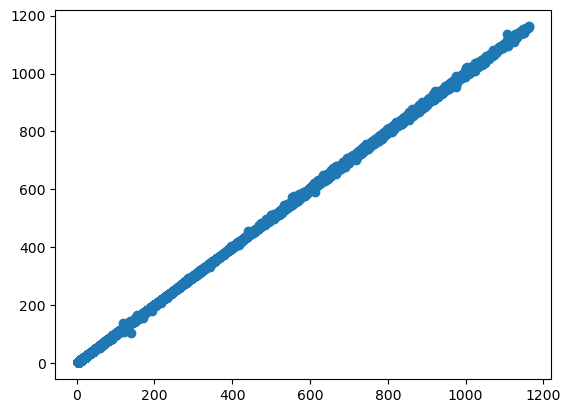

In [26]:
plt.scatter(y_test,test_data_prediction)

In [27]:
print(lin_reg_model.predict([[1325412060,4,4,4,0]]))

[4.00233803]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [36]:
import pickle 

In [37]:
with open("data.pkl", "wb") as file:
    pickle.dump(lin_reg_model, file)

In [38]:
with open("data.pkl", "rb") as file:  
    loaded_data = pickle.load(file)  
    print(loaded_data) 

LinearRegression()
